In [36]:
# Import relevant Python libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np

In [37]:
# Import your data
data = pd.read_csv("marketing_sales_data.csv")

In [38]:
# Display the first 10 rows of the data.

data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [39]:
# Display number of rows and number of columns

np.shape(data)

(572, 5)

In [40]:
# check for missing data

data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [41]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [42]:
# Use .sum() to get the number of rows that contain missing values.

data.isna().any(axis=1).sum()

3

In [43]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. 
#To update the DataFrame, reassign it to the result.

data = data.dropna(axis=0)

In [44]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values

data.isna().any(axis=1).sum()


0

In [45]:
# Create plot of pairwise relationships.

sns.pairplot(data)

In [46]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression


ols_data = data[["Radio", "Sales"]]

In [47]:
# Display first 10 rows of the new DataFrame

ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [48]:
# Write the linear regression formula
# Save it in a variable

ols_formula = "Sales ~ Radio"

ols_formula

'Sales ~ Radio'

In [49]:
# Implement OLS

OLS = ols(formula = ols_formula, data = ols_data)

In [50]:
# Fit the model to the data
# Save the fitted model in a variable

model = OLS.fit()

In [51]:
# Get summary of results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          2.07e-176
Time:                        17:49:28   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot the OLS data with the best fit regression line.

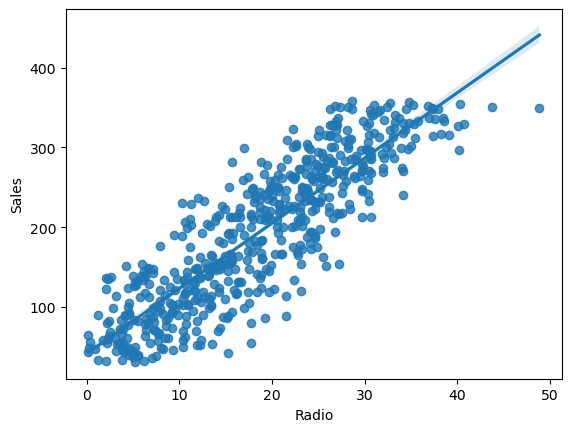

In [61]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x = "Radio", y = "Sales", data = ols_data)
plt.show()

Check the normality assumption

In [53]:
# Get the residuals from the model.

residuals = model.resid

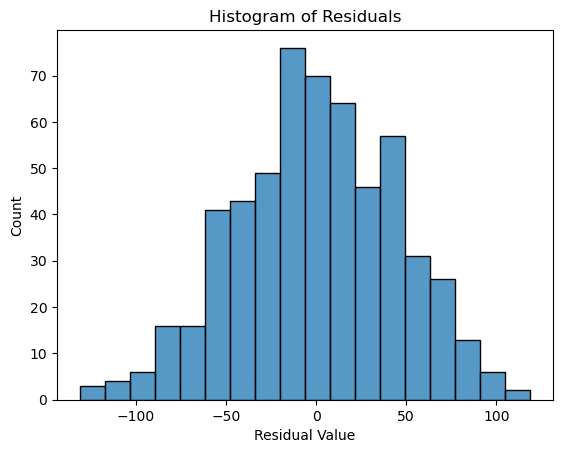

In [64]:
# Visualize the distribution of the residuals.

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Create a Q-Q plot to confirm the assumption of normality.

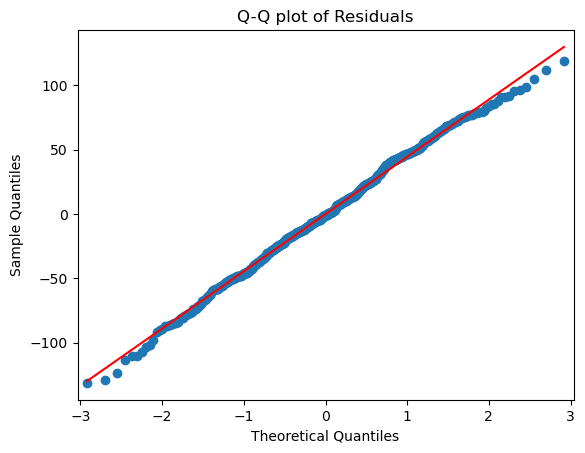

In [68]:
# Create a Q-Q plot.

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

Check the assumptions of independent observation and homoscedasticity

In [69]:
# Get fitted values

fitted_values = model.predict(ols_data["Radio"])

Create a scatterplot of the residuals against the fitted values.

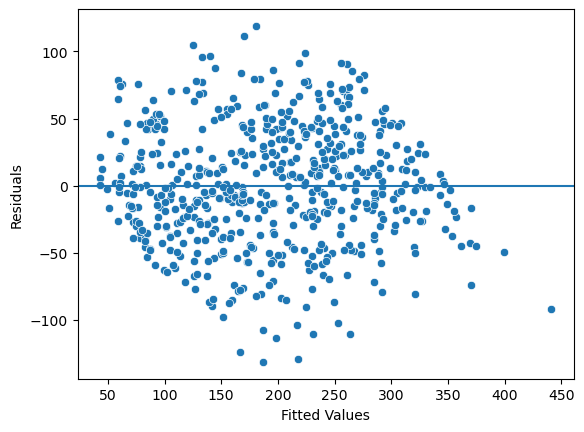

In [70]:
# Create a scatterplot of residuals against fitted values


fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

# Conclusion

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 

One interpretation:

If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average. 

Another interpretation: 

Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.